<img src="https://www.udp.cl/cms/wp-content/uploads/2021/06/UDP_LogoRGB_2lineas_Color_SinFondo.png" width="500" height="100"> <p> Ciencias de Datos para la Economía / Examen final
</p>  <p> Ingeniería Comercial 



In [12]:
import pandas as pd
df = pd.read_csv('nba_logreg2.csv', sep = ";")


| Nombre columnas | Contenido |
|--- | --- |
|Name   |Nombre |
| GP    |Juegos jugados |
| MIN   |Minutos jugados |
| PTS   |Puntos por partido |
| FGM   |Objetivos de campo realizados |
| FGA   |Objetivos de campo intentados |
| FG%   |Porcentaje de puntos de campo |
| 3P Mode   |3 puntos hecho |
| 3PA   |Intentos de 3 puntos |
| 3P%   |3 puntos por ciento |
| FTM   |Tiro libre hecho |
| FTA   |Intentos de lanzamiento libre |
| FT%   |Porcentaje de lanzamiento libre |
| OREB  |Rebotes ofensivos |
| DREB  |Rebotes defensivos |
| REB   |Rebotes |
| AST   |Asistencias |
| STL   |Roba |
| BLK   |Bloques |
| TOV   |Pérdidas de balón |
| TARGET_5Yrs   |Variable predictora (1-Si la duración de la carrera>= 5 años) y (0-si<5) |

 Aca podemos ver una descripcion general de las variables que se encuentran dentro de nuestro DataSet, trabajaremos con estas variables a lo largo del desarrollo de este trabajo

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

Podemos ver que la mayoria de las variables, son variables numericas. Solamente el nombre esta como tipo object. Podemos ver que no existe perdida de datos. Ya que todas las columnas cuentan con la misma cantidad de variables.

In [14]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00,1329.00
mean,60.40,17.65,6.82,2.63,5.90,44.12,0.25,0.79,19.31,1.30,1.83,70.41,1.01,2.02,3.03,1.56,0.62,0.37,1.20,0.62
std,17.48,8.33,4.37,1.69,3.60,6.12,0.38,1.06,16.02,0.99,1.33,10.49,0.78,1.36,2.06,1.47,0.41,0.43,0.72,0.49
min,11.00,3.10,0.70,0.30,0.80,23.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.30,0.00,0.00,0.00,0.10,0.00
25%,47.00,10.80,3.70,1.40,3.30,40.20,0.00,0.00,0.00,0.60,0.90,64.80,0.40,1.00,1.50,0.60,0.30,0.10,0.70,0.00
50%,63.00,16.10,5.60,2.10,4.80,43.90,0.10,0.30,22.40,1.00,1.50,71.30,0.80,1.70,2.50,1.10,0.50,0.20,1.00,1.00
75%,77.00,22.90,8.80,3.40,7.50,47.80,0.40,1.20,32.50,1.70,2.30,77.60,1.40,2.60,4.00,2.00,0.80,0.50,1.50,1.00
max,82.00,40.90,28.20,10.20,19.80,73.70,2.30,6.50,100.00,7.70,10.20,100.00,5.30,9.60,13.90,10.60,2.50,3.90,4.40,1.00


In [15]:
print(df.isnull().sum())


Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


Aqui volvemos a confirmar lo visto anteriormente, donde encontramos que no exiten valores nulos dentro de nuestro dataset.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
variablescontinuas = [
    'MIN',
    'PTS',
    'FGM',
    'FGA',
    'FG%',
    '3P Made',
    '3PA',
    '3P%',
    'FTM',
    'FTA',
    'FT%',
    'OREB',
    'DREB',
    'REB',
    'STL',
    'BLK',
    'TOV'
]

df_1 = df[variablescontinuas]

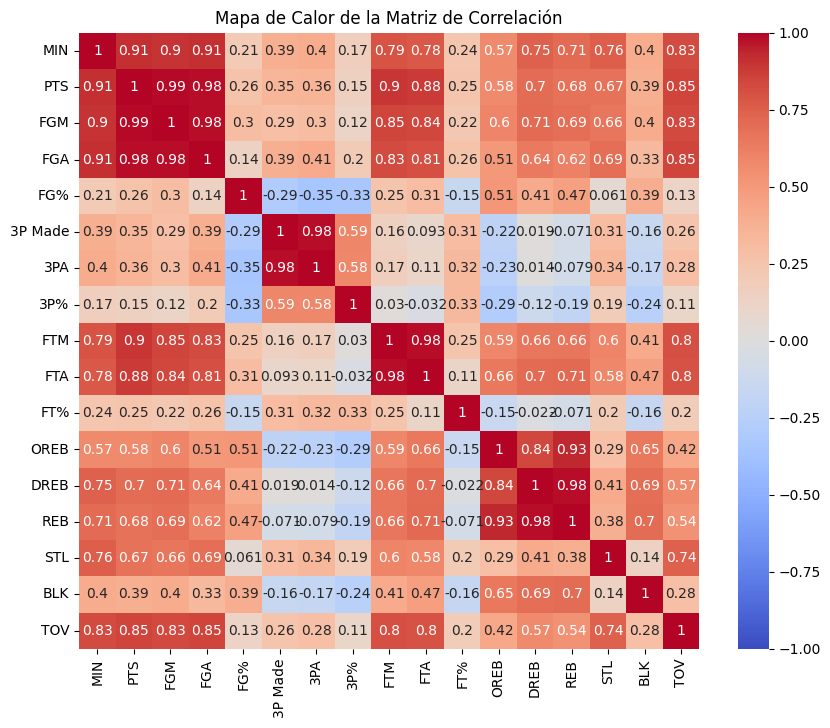

In [18]:
correlation_matrix = df_1.corr()
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Títulos y etiquetas
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Como podemos ver gracias a este grafico, nos damos cuenta de que las variables más fuertemente correlacionadas son los puntos por partido (PTS) con los minutos jugados (MIN) y los objetivos de campo realizados (FGM), lo cual indica que a mayor tiempo en cancha y efectividad en tiros de campo, se obtienen más puntos. Las pérdidas de balón (TOV) están negativamente correlacionadas con el porcentaje de tiros libres (FT%) y los bloqueos (BLK), sugiriendo que estos aspectos del juego tienden a no ocurrir simultáneamente.

## Primera parte finalizada
Con esto podemos hacer un analisis más claros de las variables. Donde pudimos ver la matriz de correlaciones de las variables numericas y una descripcion general de las variables, como el promedio, media, los valores maximos y minimos. Al finalizar esta parte procederemos a la segunda etapa en la cual plantearemos un modelo PCA.

# Segunda parte 
## Realizar PCA y Supuestos

En primer lugar, el análisis de componentes principales (PCA) nos puede ayudar a solucionar problemas de reducción de dimensionalidad y extracción de características en nuestros datos de forma automática. De cierta forma esta tecnica nos ayuda a conseguir una representacion de un conjunto de datos de una manera más reducida, minimizando el error cuadratico medio.

Ocuparemos nuestras variables continuas, el primer paso de esto es scalar nuestras variables para reducir la influencia que pueden tener las escalas en nuestro modelo. 

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
data_std =  StandardScaler().fit_transform(df_1)
df_data_std = pd.DataFrame(data_std, columns=df_1.columns)

In [21]:
df_data_std.iloc[:,:-1].apply(lambda x: np.mean(x).round(2))

MIN        0.00
PTS        0.00
FGM       -0.00
FGA       -0.00
FG%        0.00
3P Made    0.00
3PA        0.00
3P%        0.00
FTM       -0.00
FTA        0.00
FT%        0.00
OREB       0.00
DREB      -0.00
REB       -0.00
STL        0.00
BLK       -0.00
dtype: float64

In [22]:
df_data_std.iloc[:,:-1].apply(lambda x: np.var(x))

MIN       1.00
PTS       1.00
FGM       1.00
FGA       1.00
FG%       1.00
3P Made   1.00
3PA       1.00
3P%       1.00
FTM       1.00
FTA       1.00
FT%       1.00
OREB      1.00
DREB      1.00
REB       1.00
STL       1.00
BLK       1.00
dtype: float64

## PCA con sklearn

### Aplicar función PCA

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Aplicar función PCA

In [24]:

pca = PCA()

data_std_pca = pca.fit_transform(data_std)

pct_varianza_explicada = pca.explained_variance_ratio_
pct_varianza_explicada

array([5.22282282e-01, 2.14809762e-01, 6.18260847e-02, 4.64361577e-02,
       3.75931550e-02, 2.97432309e-02, 2.72973750e-02, 2.27752513e-02,
       1.53591058e-02, 1.00726890e-02, 6.45393534e-03, 3.72217172e-03,
       8.66385485e-04, 4.54442842e-04, 2.76396850e-04, 2.16535884e-05,
       9.92077597e-06])

### Indice KMO de Kaiser-Meyer-Olkin 


In [25]:
#@title Obtener los autovalores y aplicar índice KMO
autovalores = np.linalg.eigvals(np.corrcoef(df_data_std.T))

print(f'Los autovalores son los siguientes: {autovalores}')

# Filtro limite KMO
autovalores_kaiser = autovalores[autovalores>=0.8]

# Cantidad autovalores
cantidad_autovalores_kaiser = len(autovalores_kaiser)
print('\n')
print(f'La cantidad de componentes a utilizar asciende a {cantidad_autovalores_kaiser}')

Los autovalores son los siguientes: [8.87879880e+00 3.65176595e+00 1.05104344e+00 7.89414680e-01
 6.39083634e-01 4.64055375e-01 5.05634925e-01 3.87179271e-01
 2.61104798e-01 1.71235713e-01 1.09716901e-01 6.32769193e-02
 1.47285532e-02 7.72552831e-03 4.69874645e-03 1.68653191e-04
 3.68111003e-04]


La cantidad de componentes a utilizar asciende a 3


### Varianza acumulada

In [26]:
#@title Varianza acumulada
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores), len(autovalores)))


# Visualizar matriz, solamente la cantidad de componentes sugerido el criterio de Kaiser.
matriz_var_expl.iloc[:,0:cantidad_autovalores_kaiser]


,pct_var_expl,pct_var_expl_acum
1.00,52.23,52.23
2.00,21.48,73.71
3.00,6.18,79.89
4.00,4.64,84.54
5.00,3.76,88.29
6.00,2.73,91.02
7.00,2.97,94.00
8.00,2.28,96.28
9.00,1.54,97.81
10.00,1.01,98.82


Con las 3 componentes seleccionadas explicamos el 79.89% de la varianza total de la data original. 

La forma de encontrar el numero de componentes fue de manera automatica con un codigo el cual nos ayuda a poder hacerlo de una manera más facil.  

Pero hay que tener en consideracion lo siguiente, para aplicar PCA y estar seguro de lo que estamos haciendo esta bien hay que cumplir los siguentes supuestos:

## Supuestos para Aplicar PCA

1. **Linealidad:** Las relaciones entre las variables deben ser lineales. PCA se basa en las correlaciones entre las variables, por lo que las relaciones tienen que ser lineales.

2. **Escalabilidad:** Las variables deben estar en la misma escala. Si las variables tienen diferentes unidades o escalas, es importante estandarizarlas antes de aplicar PCA. (Por eso escalamos todas nuestras variables)

3. **Independencia de las observaciones:** Las observaciones deben ser independientes entre sí. 

4. **Ausencia de colinealidad perfecta:** No debe haber colinealidad perfecta entre las variables. Por eso plamteamos una matriz de Corr, para analizar si existia colinealidad perfecta.





In [27]:
pca = PCA(n_components=3)  # Especifica el número de componentes principales que deseas
df_reduced_pca = pca.fit(data_std)  # Ajusta el modelo PCA a tus datos
# Generar DataFrame con los loading
df_loading = pd.DataFrame(pca.components_.T, columns=['CP 1', 'CP 2', 'CP 3'], index=df_1.columns)
df_loading

,CP 1,CP 2,CP 3
MIN,0.31,0.09,0.04
PTS,0.32,0.08,-0.08
FGM,0.32,0.06,-0.08
FGA,0.31,0.13,-0.07
FG%,0.11,-0.30,0.02
3P Made,0.08,0.43,0.41
3PA,0.09,0.44,0.37
3P%,0.02,0.38,0.22
FTM,0.30,0.01,-0.23
FTA,0.31,-0.05,-0.18



### Primer Componente Principal (CP1)

La primera componente principal se puede expresar como:

$PC1 = 0.315 \times MIN + 0.324 \times PTS + 0.320 \times FGM + 0.311 \times FGA + 0.111 \times FG\% + 0.083 \times 3P \, Made + 0.086 \times 3PA + 0.020 \times 3P\% + 0.303 \times FTM + 0.305 \times FTA + 0.061 \times FT\% + 0.240 \times OREB + 0.279 \times DREB + 0.276 \times REB + 0.234 \times STL + 0.179 \times BLK + 0.287 \times TOV$

El hecho de que esta componente recoge mayoritariamente información de las variables `MIN`, `PTS`, `FGM`, y `FGA` implica que esta componente está relacionada con la cantidad de tiempo jugado y la efectividad en el juego, en términos de puntos y tiros de campo.

### Segundo Componente Principal (CP2)

La segunda componente principal se puede expresar como:

$PC2 = 0.094 \times MIN + 0.083 \times PTS + 0.056 \times FGM + 0.129 \times FGA - 0.300 \times FG\% + 0.433 \times 3P \, Made + 0.444 \times 3PA + 0.383 \times 3P\% + 0.008 \times FTM - 0.047 \times FTA + 0.260 \times FT\% - 0.293 \times OREB - 0.178 \times DREB - 0.229 \times REB + 0.155 \times STL - 0.265 \times BLK + 0.096 \times TOV$

Esta componente está principalmente influenciada por las variables `3P Made`, `3PA`, y `3P%`, lo que sugiere que CP2 está relacionado con la efectividad y la cantidad de intentos de tiros de tres puntos.

### Tercer Componente Principal (CP3)

La tercera componente principal se puede expresar como:

$PC3 = 0.039 \times MIN - 0.077 \times PTS - 0.077 \times FGM - 0.074 \times FGA + 0.018 \times FG\% + 0.407 \times 3P \, Made + 0.369 \times 3PA + 0.217 \times 3P\% - 0.234 \times FTM - 0.178 \times FTA - 0.340 \times FT\% + 0.179 \times OREB + 0.283 \times DREB + 0.254 \times REB - 0.230 \times STL + 0.374 \times BLK - 0.247 \times TOV$

La tercera componente recoge mayor peso de las variables `3P Made`, `3PA`, `FTM`, y `FTA`, lo que implica que esta componente está más relacionada con los tiros libres y la efectividad en los tiros de tres puntos.


In [28]:
puntajes = np.dot(df_data_std, pca.components_.T)

In [29]:
df_puntajes = pd.DataFrame(puntajes, columns=['CP 1', 'CP 2', 'CP 3'] ,index = df.index)
df_puntajes

,CP 1,CP 2,CP 3
0,1.01,1.31,1.12
1,1.37,2.80,0.04
2,-1.13,0.87,0.68
3,-1.33,0.13,-0.51
4,-1.34,-1.83,-0.36
...,...,...,...
1324,-1.75,0.07,-1.24
1325,-1.85,1.00,-1.17
1326,-0.67,-2.41,0.17
1327,-2.23,-0.34,-0.99


Aqui podemos ver el valor de las componentes principales para cada observación

# Tercera parte 
## LazyClassifier

¿Que es LazyClassifier?
En primer lugar, ejecuta multiples modeloss de aprendizaje automatico. La biblioteca LazyClassifier facilita esta tarea al permitir ejecutar múltiples modelos con pocas líneas de código. Es de fácil uso e instalación, además de ser de código abierto y estar publicada bajo la licencia MIT.

¿Que es LazyClassifier?
En primer lugar, ejecuta multiples modeloss de aprendizaje automatico. La biblioteca LazyClassifier facilita esta tarea al permitir ejecutar múltiples modelos con pocas líneas de código. Es de fácil uso e instalación, además de ser de código abierto y estar publicada bajo la licencia MIT.

In [30]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [36]:
y = df['TARGET_5Yrs']

In [37]:
X = df_1

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [39]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [41]:
models, predictions = LazyClassifier().fit(X_train_std, X_test_std, y_train, y_test)

 97%|█████████▋| 30/31 [00:01<00:00, 21.49it/s]

[LightGBM] [Info] Number of positive: 657, number of negative: 406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618062 -> initscore=0.481331
[LightGBM] [Info] Start training from score 0.481331


100%|██████████| 31/31 [00:01<00:00, 21.62it/s]


LazyClassifier nos enterga 27 modelos diferentes. Dentro de lo que vamos a ver encontramos el modelo y la prediccion de este mismo. Podemos ver la precision del modelo.

In [42]:
models[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.67,0.69,0.69,0.67,0.01
SGDClassifier,0.71,0.69,0.69,0.71,0.01
BernoulliNB,0.68,0.69,0.69,0.69,0.01
QuadraticDiscriminantAnalysis,0.62,0.66,0.66,0.63,0.02
GaussianNB,0.61,0.66,0.66,0.61,0.01
LogisticRegression,0.70,0.65,0.65,0.69,0.04
CalibratedClassifierCV,0.70,0.64,0.64,0.68,0.02
RidgeClassifierCV,0.70,0.64,0.64,0.68,0.02
RidgeClassifier,0.70,0.64,0.64,0.68,0.01


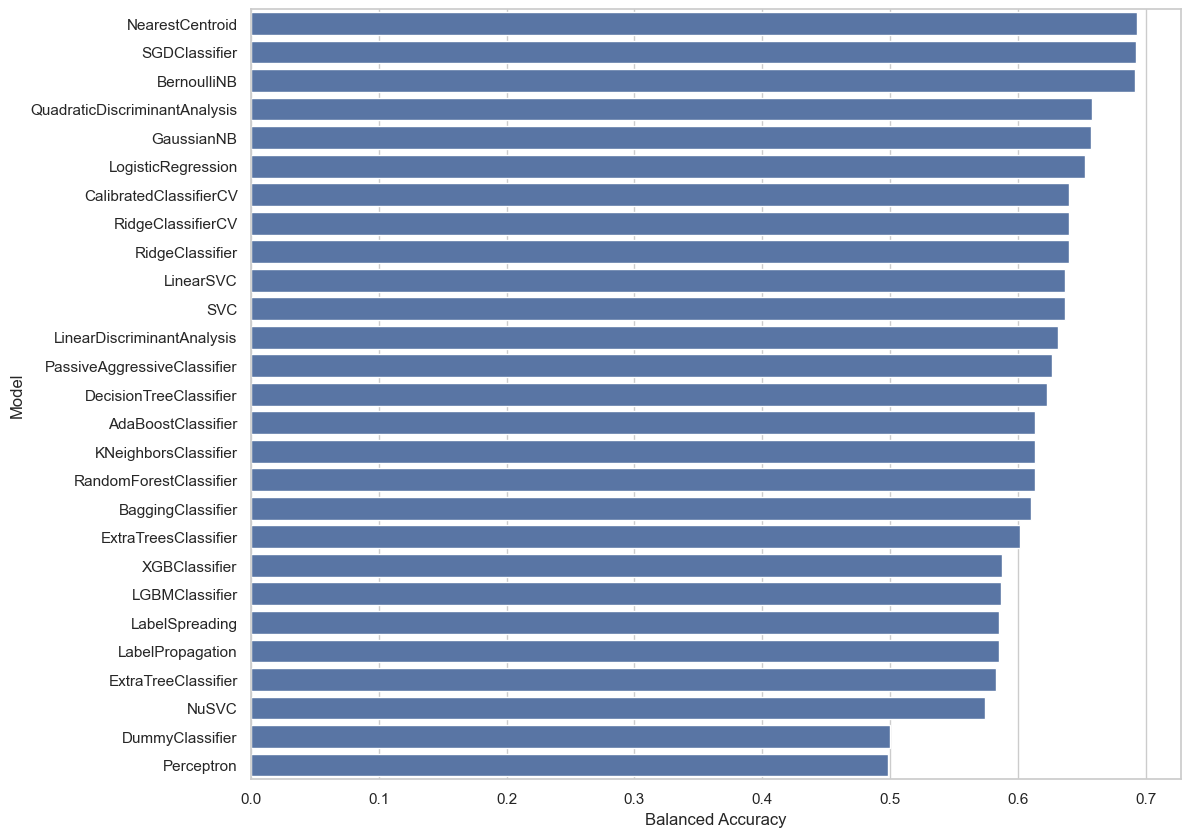

In [44]:
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)

El resultado de este gráfico muestra los modelos de predicción disponibles en LazyClassifier. Dentro de los modelos de aprendizaje supervisado que vimos a lo largo del semestre, podemos identificar la regresión logística (que en este caso sería binaria), random forest, XGBoost y KNN. Entre los primeros modelos con mayor precisión, por el momento no reconocemos ninguno.